# Create the Dataset
The goal here is to capture the frame from video to use them as images to train a model.

In [335]:
import cv2
import os 
import numpy as np 
import pandas as pd
import shutil
import matplotlib.pyplot as plt 
%matplotlib inline

In [336]:
dir_path = "dataset/data"

In [337]:
# code to remove "dataset/data"
try:
    shutil.rmtree(dir_path)
except:
    print("OK")

## Let's load a video

In [338]:
from IPython.display import HTML

# Assuming your video file's name is "your_video.mp4" and is located in the same directory as your Jupyter Notebook
video_filename = "your_video.mp4"

# Display the video
HTML(f"""
    <video width="800" controls>
        <source src="{"dataset/row-data/IMG_2497.mp4"}" type="video/mp4">
    </video>
""")


In [339]:
# Get video list names
file_list = os.listdir("dataset/row-data/")
list_videos = [file for file in file_list if file.endswith((".mp4", ".MOV"))]
list_videos

['IMG_2497.mp4',
 'IMG_2506.mp4',
 'IMG_2510.mp4',
 'IMG_2512.mp4',
 'IMG_2550.mp4']

## let's remove the sound and change all video format to mp4

In [340]:
# Load the video 
cap = cv2.VideoCapture("dataset/row-data/IMG_2497.mp4")

# Set the frame number and time to extract the image
print("Number of frame:", int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
# Get the frames per second of the video
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"The frame rate of the video is: {fps} fps")


Number of frame: 603
The frame rate of the video is: 30.0 fps


 708 frames, it means there are 708 distinct images that make up the video. Each frame is essentially an image. When these frames are played in sequence at a certain frame rate (for example, 24, 30, or 60 frames per second), they create the illusion of motion, which is how video works.

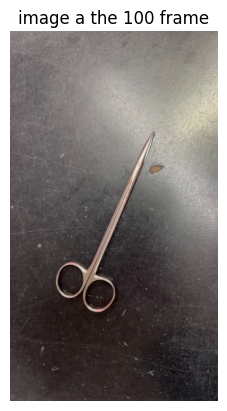

In [341]:
# sets the position of the next frame to be captured or read in the video
frame_number = 100
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# read the frame
ret, frame = cap.read()

# Convert BGR to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


# Diplay image
plt.imshow(frame_rgb)
plt.axis("off")
plt.title("image a the 100 frame")
plt.show()

In [342]:
# clean up and release resources once they are no longer needed
cap.release()

# Now we can us this techinque to create a dataset.

In [343]:
# Get number of frame per videos

dir_path = "dataset\\row-data"
video_path_list = []
number_of_image_per_videos = {}

for name_video in list_videos:
    video_path = os.path.join(dir_path, name_video)
    # Save video path
    video_path_list.append(video_path)
    # load video
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print(f"Could not open video Check the path {path}")
        continue
    
    # Get and store the number of frames
    number_of_image_per_videos[name_video] = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    
    # clean up and release resources once they are no longer needed
    cap.release()

# Convert to DataFrame
df = pd.DataFrame(list(number_of_image_per_videos.items()), columns=['Video_name', 'Frame_Count'])
df

,Video_name,Frame_Count
0,IMG_2497.mp4,603.0
1,IMG_2506.mp4,605.0
2,IMG_2510.mp4,811.0
3,IMG_2512.mp4,801.0
4,IMG_2550.mp4,685.0


In [344]:
df.Frame_Count.min() // 29

20.0

>intrument name : (video name or 0) 0 is for default values (or none)

In [345]:
image_correspond = {
    "Ciseaux Mayo": "IMG_2506.mp4",
    "Ciseaux micro" : "IMG_2512.mp4",
    "Ciseaux Stevens": "IMG_2497.mp4",
    "Ciseaux Stille": "IMG_2510.mp4",
    "Ciseaux à plâtre": "IMG_2550.mp4",
    
}

## Code below to have all the frame (duplcated images!)

In [346]:
""" def video_to_image(video_path, image_name, new_dir_path, img_format=".jpg"):
    check_dir_path = os.path.join(new_dir_path, image_name)
    if not os.path.exists(check_dir_path):
        # Create the directory
        os.makedirs(check_dir_path)
        
    # load video
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if cap.isOpened():
        for i in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
            
            # sets the position
            cap.set(cv2.CAP_PROP_POS_FRAMES, i)

            # read the frame
            ret, frame = cap.read()
            
            # if ret == true the frame has been read correctly
            if ret:
                # Construct the path for saving the image
                img_path = os.path.join(check_dir_path, image_name + f"_{i}{img_format}")
                # Save the frame as an image file
                cv2.imwrite(img_path, frame) 
    else:
        print(f"Could not open video Check the path {path}")
        # Save the images in the folder
        
    # clean up and release resources once they are no longer needed
    cap.release()
 """

' def video_to_image(video_path, image_name, new_dir_path, img_format=".jpg"):\n    check_dir_path = os.path.join(new_dir_path, image_name)\n    if not os.path.exists(check_dir_path):\n        # Create the directory\n        os.makedirs(check_dir_path)\n        \n    # load video\n    cap = cv2.VideoCapture(video_path)\n\n    # Check if video opened successfully\n    if cap.isOpened():\n        for i in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):\n            \n            # sets the position\n            cap.set(cv2.CAP_PROP_POS_FRAMES, i)\n\n            # read the frame\n            ret, frame = cap.read()\n            \n            # if ret == true the frame has been read correctly\n            if ret:\n                # Construct the path for saving the image\n                img_path = os.path.join(check_dir_path, image_name + f"_{i}{img_format}")\n                # Save the frame as an image file\n                cv2.imwrite(img_path, frame) \n    else:\n        print(f"Could 

## Code below is taking a frame each 10 frame 

In [347]:
from PIL import Image

def video_to_image(video_path, image_name, dir_path, frame_number=0, skip_frames=29, img_format=".jpg"):
    # Create a directory to store the images
    image_dir_path = os.path.join(dir_path, image_name)
    if not os.path.exists(image_dir_path):
        os.makedirs(image_dir_path)

    # Load the video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Could not open video. Check the path: {video_path}")
        return

    while True:
        # Set the position of the next frame to be read
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

        # Read the frame
        ret, frame = cap.read()
        if not ret:
            break  # Exit the loop if no frame is read$
        
        # Convert BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
         # Convert to PIL Image
        pil_image = Image.fromarray(frame_rgb)
        

        # Save the frame
        img_path = os.path.join(image_dir_path, f"{image_name}_{frame_number}{img_format}")
        pil_image.save(img_path)

        # Increment the frame counter
        frame_number += skip_frames + 1

    # Clean up and release resources once they are no longer needed
    cap.release()


In [348]:
folder_name = "dataset\\data"
if not os.path.exists(folder_name):
    # Create the directory
    os.makedirs(folder_name)

video_dir = "dataset\\row-data"
dir_path = "dataset\\data"


# Call the function and save the images
for image_name, video_name in image_correspond.items():
  
   # Take image form video and save them
    if isinstance(video_name, str): # Check if video_name is a string
        video_path = os.path.join(video_dir, video_name)
        if os.path.exists(video_path):
            video_to_image(video_path, image_name, dir_path)
            print(f"{image_name} done")
        else:
            print(f"Please check path: {video_path}")
    else: 
        print(f"{video_name} is not a string. Please enter a video name")
        continue 


Ciseaux Mayo done
Ciseaux micro done
Ciseaux Stevens done
Ciseaux Stille done
Ciseaux à plâtre done


Nuber of categories: 5
Number of images: 120


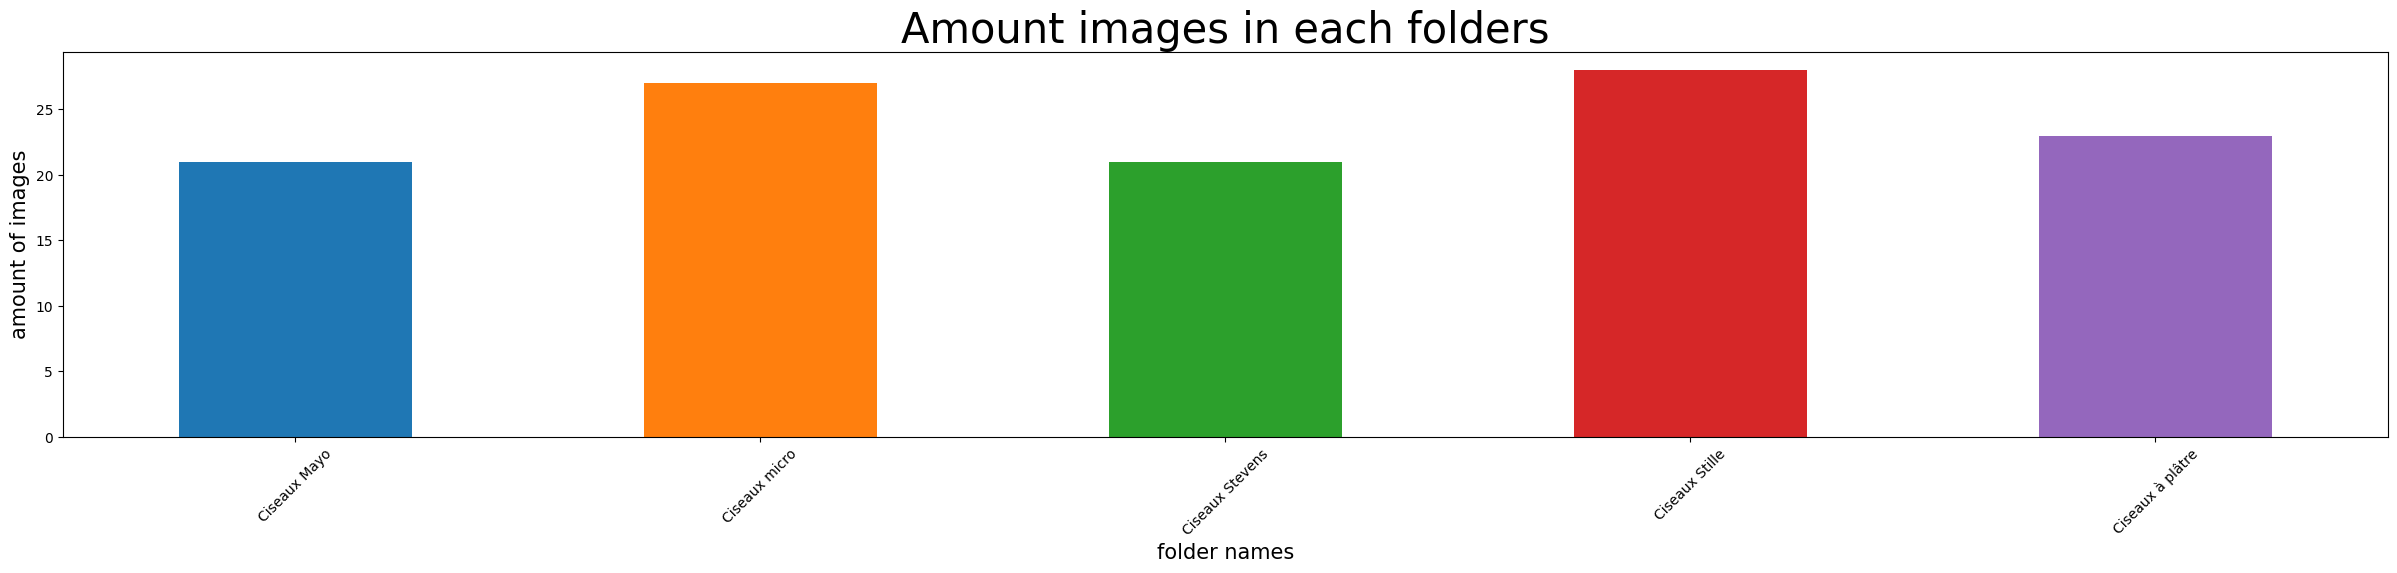

In [349]:
# Initialise empty dictionary and list
img_paths = {}
img_count = {}


# Loop over all subfolders in the directory
for subfolder_name in os.listdir(dir_path):

    # Get the full path to the subfolder
    subfolder_path = os.path.join(dir_path, subfolder_name)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
    
        # Save number of images and class name
        img_count[subfolder_name] = len(os.listdir(subfolder_path))

        # Initialise the key with an empty list
        img_paths[subfolder_name] = []
        for img_name in os.listdir(subfolder_path):
            # Save the full path for each image
            img_path = os.path.join(subfolder_path, img_name)

            # Save image paths
            img_paths[subfolder_name].append(img_path)



print("Nuber of categories:", len(img_count))
print("Number of images:", sum(img_count.values()))

# Create a dictionary of kwargs
xlim_kwargs = {"left": -0.5, "right": (len(img_count) - 1) + 0.5}


# Plot the images in each folder
plt.figure(figsize=(30, 5))
for f in img_count:
    plt.bar(f, img_count.get(f), width=0.5)
plt.xlim(**xlim_kwargs)
plt.xticks(rotation=45)
plt.title("Amount images in each folders", fontsize=30)
plt.xlabel("folder names", fontsize=15)
plt.ylabel("amount of images", fontsize=15)
plt.show()

In [350]:
import imagehash
from PIL import Image

# A dictionary to store the hashes of each image

image_to_delete = []
duplicated_image = []
original_image = []

# Loop over all subfolders in the directory
for subfolder_name in os.listdir(dir_path):
    # Get the full path to the subfolder
    subfolder_path = os.path.join(dir_path, subfolder_name)
    
    # Reset the hash for each new folder
    hashes = {}
    
    # Check if the subfolder is a directory
    if os.path.isdir(subfolder_path):
        # Loop over all files in the subfolder
        for filename in os.listdir(subfolder_path):
            # Get the full path to the file
            file_path = os.path.join(subfolder_path, filename)

            # Check if the file is an image
            try:
                # Open the image
                with Image.open(file_path) as image:
                    # Calculate the hash of the image
                    hash = str(imagehash.phash(image, hash_size=6))

                    # Check if the hash is already in the dictionary
                    if hash in hashes:
                        # If the hash is already in the dictionary, it means that the image is a duplicate
                        # Save duplicate file path 
                        duplicated_image.append(file_path)
                        # Save corresponding duplicate image (original image)
                        original_image.append(hashes[hash])
                    else:
                        # If the hash is not in the dictionary, add it to the dictionary
                        hashes[hash] = file_path

             # If we can't open the image we save in image_to_delete
            except:
                image_to_delete.append(file_path)

    """ print(f"folder {subfolder_name} is done") """


print(f"\nNumber of duplicate images:{len(duplicated_image)}")
print(f"Number of image we can't open:{len(image_to_delete)}")


Number of duplicate images:1
Number of image we can't open:0


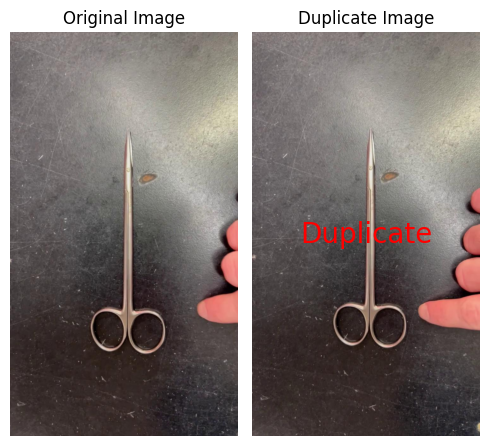

In [351]:
# Define a function to open a image
def open_img(path):
    with Image.open(path) as img:
        return np.array(img)


# Visualize the duplicate image pairs
number_of_image_to_display = 6

# Assuming duplicated_image and original_image are your lists of image paths
# Update number_of_image_to_display based on the actual number of image pairs
actual_number_of_pairs = min(number_of_image_to_display, len(duplicated_image), len(original_image))

# Create a figure with two subplots
fig, axes = plt.subplots(actual_number_of_pairs, 2, figsize=(5, 10))

for i, (duplicate_path, img_path) in enumerate(zip(duplicated_image[:number_of_image_to_display], original_image[:number_of_image_to_display])):
 
    # Open the image 
    original_img = open_img(img_path)
    duplicate_img = open_img(duplicate_path)
    
    # Display the images
    if actual_number_of_pairs == 1:
        # Handling for a single pair of images
        axes[0].imshow(original_img)
        axes[0].set_title("Original Image")
        axes[0].axis("off")

        axes[1].imshow(duplicate_img)
        axes[1].set_title("Duplicate Image")
        axes[1].axis("off")
        axes[1].text(
            0.5, 0.5, "Duplicate",
            horizontalalignment="center",
            verticalalignment="center",
            transform=axes[1].transAxes,
            fontsize=20,
            color="red",
        )
    else:
        axes[i, 0].imshow(original_img)
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(duplicate_img)
        axes[i, 1].set_title("Duplicate Image")
        axes[i, 1].axis("off")

        # Add a text label to indicate the duplicate relationship
        axes[i, 1].text(
            0.5, 0.5, "Duplicate",
            horizontalalignment="center",
            verticalalignment="center",
            transform=axes[i, 1].transAxes,
            fontsize=14,
            color="red",
        )

# Show the figure
plt.tight_layout()
plt.show()

In [352]:
# Delete images in the set
for img_path in duplicated_image:
    # Remove file
    if os.path.isfile(img_path):
        os.remove(img_path)
    else:
        print(f"The path is not a file or folder {img_path}")

# Let's remove images that are not good representation of instruments

### The regex pattern ``r"(.+?)_"`` means:
- ``(.+?)``: Capture one or more characters ``(.+)`` as few times as possible to make the regex match ``(?)``, forming a group ``()``.
- ``_``: Up to the underscore character.
- ``re.match(pattern, filename)`` checks if the beginning of the string matches the pattern.
- ``match.group(1)`` retrieves the first captured group, which is the string you're interested in.

In [353]:
import re
img_remove = os.listdir("img-remove")
pattern = r"(.+?)_"

for img_name in img_remove:
    match = re.match(pattern, img_name)
    if match:
        file_name = match.group(1)
        path_to_remove = os.path.join(dir_path, file_name, img_name)
    try:
        os.remove(path_to_remove)
    except:
        """ print(f"{path_to_remove} Image dosen't exist") """

Nuber of categories: 5
Number of images: 105


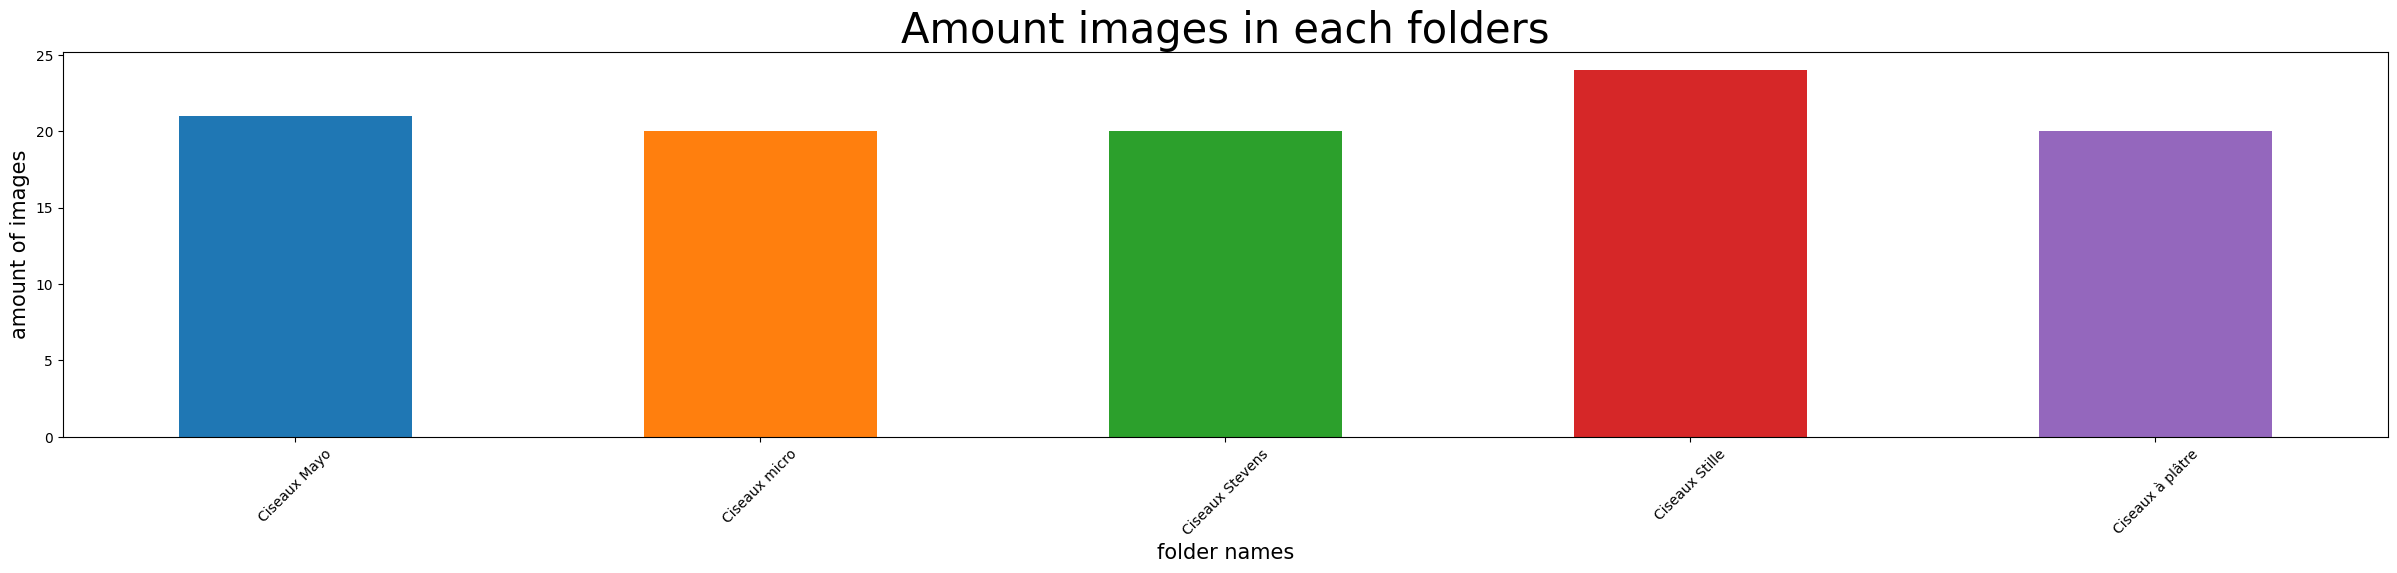

In [354]:
# Initialise empty dictionary and list
img_paths = {}
img_count = {}


# Loop over all subfolders in the directory
for subfolder_name in os.listdir(dir_path):

    # Get the full path to the subfolder
    subfolder_path = os.path.join(dir_path, subfolder_name)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
    
        # Save number of images and class name
        img_count[subfolder_name] = len(os.listdir(subfolder_path))

        # Initialise the key with an empty list
        img_paths[subfolder_name] = []
        for img_name in os.listdir(subfolder_path):
            # Save the full path for each image
            img_path = os.path.join(subfolder_path, img_name)

            # Save image paths
            img_paths[subfolder_name].append(img_path)



print("Nuber of categories:", len(img_count))
print("Number of images:", sum(img_count.values()))

# Create a dictionary of kwargs
xlim_kwargs = {"left": -0.5, "right": (len(img_count) - 1) + 0.5}


# Plot the images in each folder
plt.figure(figsize=(30, 5))
for f in img_count:
    plt.bar(f, img_count.get(f), width=0.5)
plt.xlim(**xlim_kwargs)
plt.xticks(rotation=45)
plt.title("Amount images in each folders", fontsize=30)
plt.xlabel("folder names", fontsize=15)
plt.ylabel("amount of images", fontsize=15)
plt.show()

In [355]:
img_count

{'Ciseaux Mayo': 21,
 'Ciseaux micro': 20,
 'Ciseaux Stevens': 20,
 'Ciseaux Stille': 24,
 'Ciseaux à plâtre': 20}

<!-- check the data five time the same images!!!!!! -->